# Script referente aos vídeos:

- **Aula 18**: Exercícios
- **Aula 19**: Resolução dos Exercícios - Parte I
- **Aula 20**: Resolução dos Exercícios - Parte II

# 1. Novas Perguntas do CEO - Exercícios

1. Crie uma nova coluna chamada: "dormitory_type"
- Se o valor da coluna "bedrooms" for igual a 1 => 'studio'
- Se o valor da coluna "bedrooms" for igual a 2 => 'apartment'
- Se o valor da coluna "bedrooms" for maior que 2 => 'house'
2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.
3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.
4. Faça um gráfico de barras que represente a média dos preços pelo tipo de dormitório.
5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.
6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.
7. Crie um Dashboard com os gráficos das questões 02, 04 (Dashboard: 2 colunas)
8. Crie um Dashboard com os gráficos das questões 02, 03, 04 (Dashboard: 2 colunas)
9. Crie um Dashboard com os gráficos das questões 03, 05 (Dashboard: 2 linhas)
10. Faça um gráfico (mapa) com o tamanho dos pontos sendo igual ao tamnho da sala de estar.

## 1.1 Importando a base de dados e os pacotes

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [14]:
data = pd.read_csv('datasets/kc_house_data.csv')

In [15]:
data.shape

(21613, 21)

In [16]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [17]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 2. Respondendo às perguntas

## 1. Crie uma nova coluna chamada: "dormitory_type"
- Se o valor da coluna "bedrooms" for igual a 1 => 'studio'
- Se o valor da coluna "bedrooms" for igual a 2 => 'apartment'
- Se o valor da coluna "bedrooms" for maior que 2 => 'house'

In [18]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [19]:
data['dormitory_type'] = data['bedrooms'].apply(lambda x: 'studio' if x == 1 else
                                               'apartment' if x == 2 else
                                               'house' if x > 2 else 'NA')

In [20]:
data['dormitory_type'].value_counts()

house        18641
apartment     2760
studio         199
NA              13
Name: dormitory_type, dtype: int64

## 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

In [21]:
data[['price', 'bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5.323550e+06
1,6.321093e+07
2,1.107789e+09
3,4.580264e+09
4,4.372957e+09
5,1.259346e+09
6,2.245416e+08
7,3.614502e+07
8,1.436600e+07


In [22]:
by_bedrooms = data[['price', 'bedrooms']].groupby('bedrooms').sum().reset_index()

<BarContainer object of 13 artists>

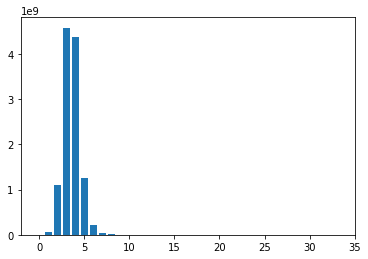

In [23]:
plt.bar(by_bedrooms['bedrooms'], by_bedrooms['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

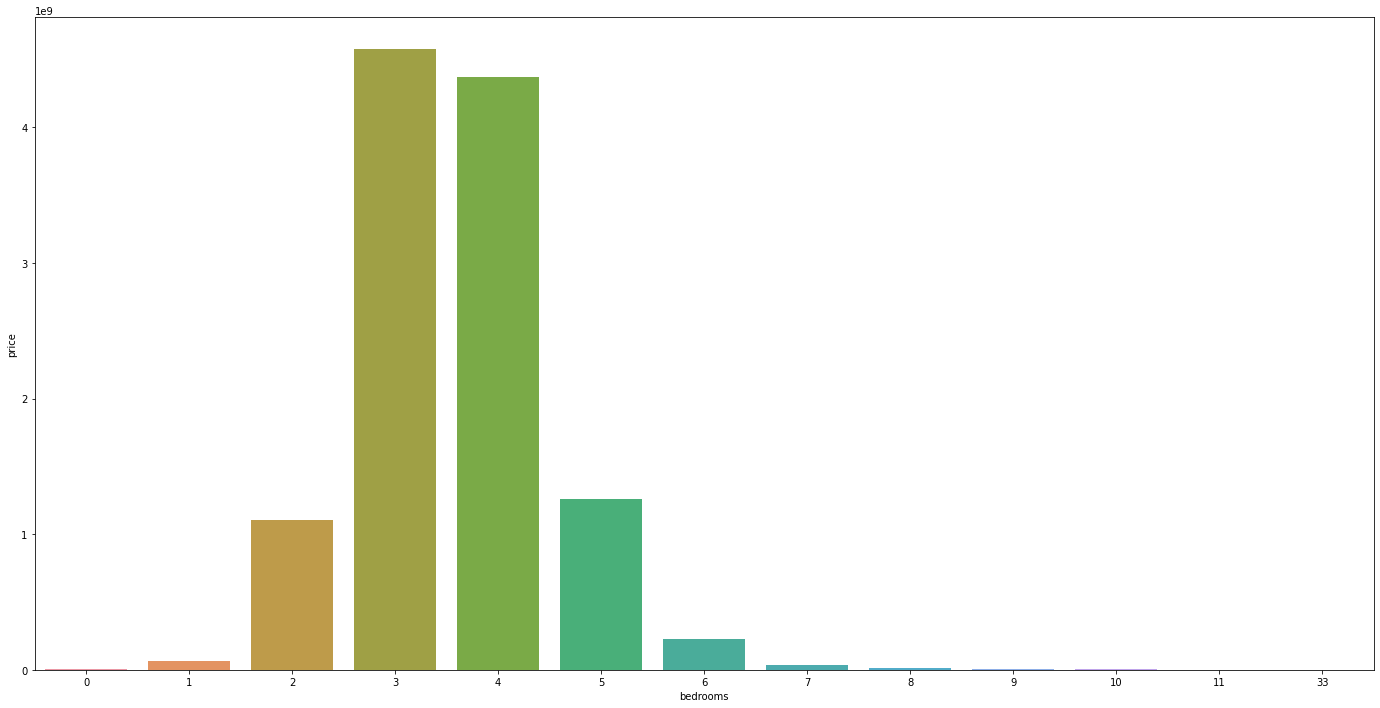

In [24]:
# Outra forma de fazer
plt.figure(figsize = (24, 12))
sns.barplot(x = 'bedrooms', y = 'price', data = by_bedrooms)

## 3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.

In [25]:
price_by_year_built = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
price_by_year_built.head()

,yr_built,price
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444


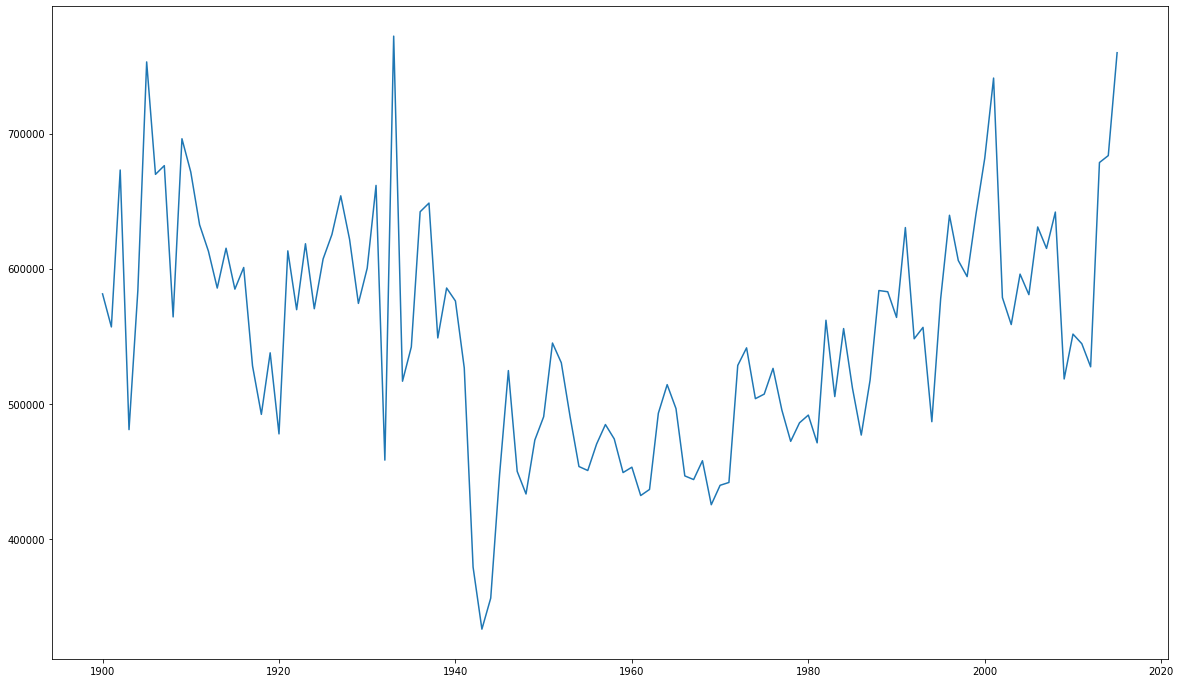

In [26]:
plt.figure(figsize = (20, 12))
plt.plot(price_by_year_built['yr_built'], price_by_year_built['price'])

<AxesSubplot:xlabel='yr_built', ylabel='price'>

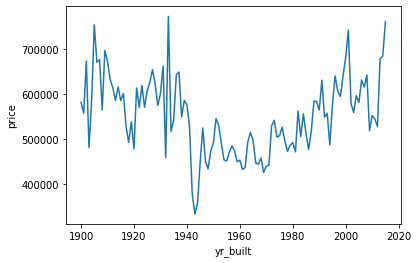

In [27]:
# Usando o sns
sns.lineplot(x = 'yr_built', y = 'price', data = price_by_year_built)   

## 4. Faça um gráfico de barras que represente a média dos preços pelo tipo de dormitório.

In [28]:
price_dormitory = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()

In [29]:
price_dormitory.head()

,dormitory_type,price
0,NA,409503.846154
1,apartment,401372.681884
2,house,563092.211899
3,studio,317642.884422


<BarContainer object of 4 artists>

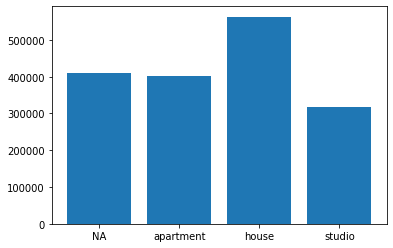

In [30]:
plt.bar(price_dormitory['dormitory_type'], price_dormitory['price'])

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

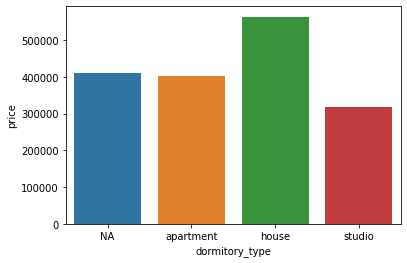

In [31]:
sns.barplot(x = 'dormitory_type', y = 'price', data = price_dormitory)

In [39]:
# Tirando o NA
no_na_price_dormitory = price_dormitory[1:4]

<AxesSubplot:xlabel='dormitory_type', ylabel='price'>

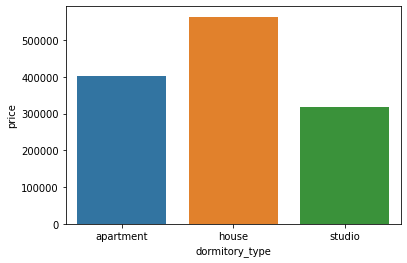

In [40]:
sns.barplot(x = 'dormitory_type', y = 'price', data = no_na_price_dormitory)

## 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

In [41]:
yr_renov_price = data[['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

In [42]:
yr_renov_price.head()

,yr_renovated,price
0,0,530360.818155
1,1934,459950.000000
2,1940,378400.000000
3,1944,521000.000000
4,1945,398666.666667


In [43]:
# Eliminando o ano 0
yr_renov_price = yr_renov_price[yr_renov_price['yr_renovated'] > 0]

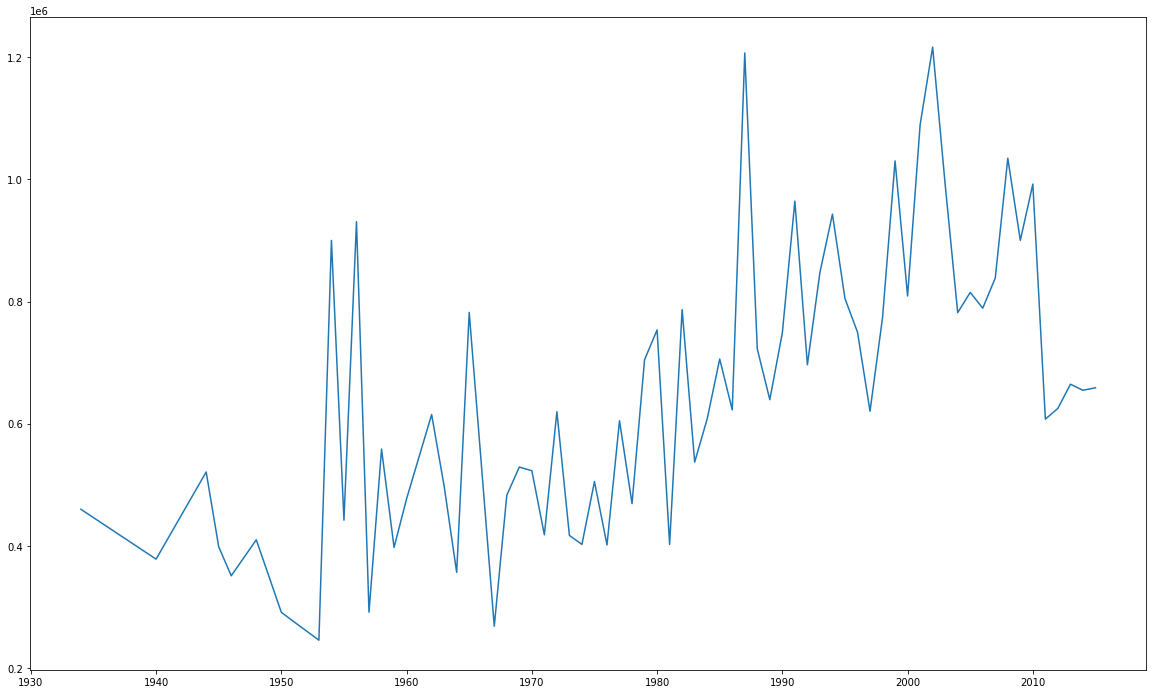

In [47]:
plt.figure(figsize = (20, 12))
plt.plot(yr_renov_price['yr_renovated'], yr_renov_price['price'])

## 6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.


In [53]:
data[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean()

price
yr_built dormitory_type               
1900     apartment       589533.333333
         house           584854.271429
         studio          398944.000000
1901     apartment       452856.400000
         house           578619.166667
...                                ...
2014     house           692687.716981
         studio          516500.000000
2015     apartment       543250.000000
         house           797383.060606
         studio          385195.000000

[305 rows x 1 columns]

## 7. Crie um Dashboard com os gráficos das questões 02, 04 (Dashboard: 2 colunas)

In [54]:
from matplotlib import gridspec

<BarContainer object of 3 artists>

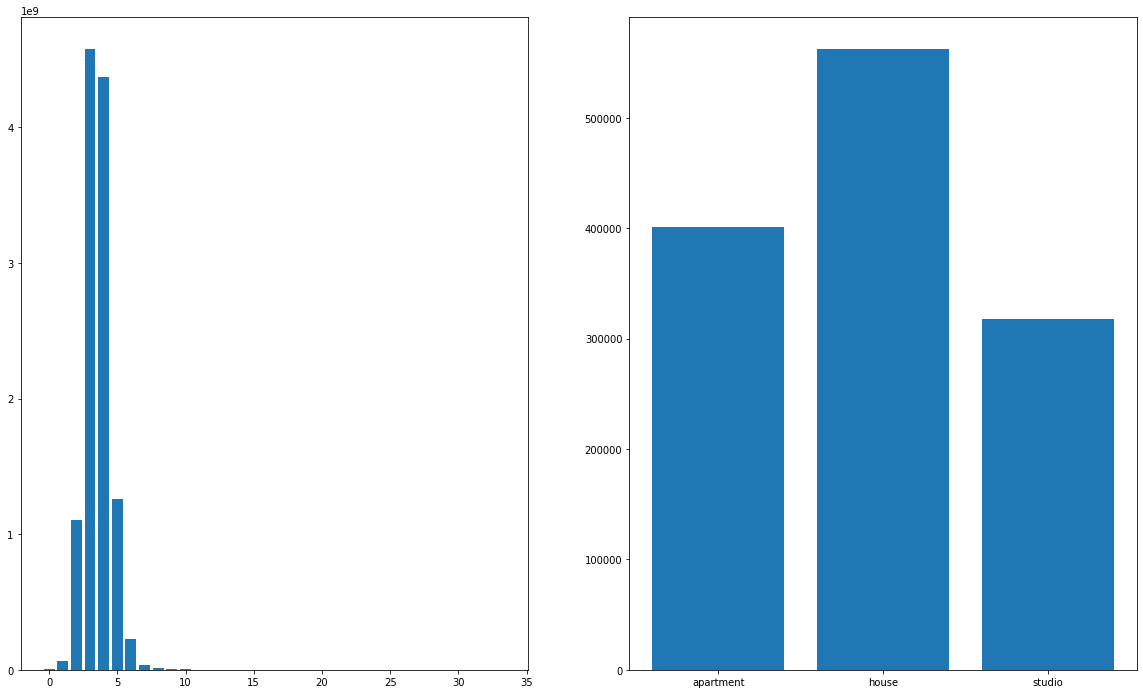

In [55]:
fig = plt.figure(figsize = (20, 12))
specs = gridspec.GridSpec(ncols = 2, nrows = 1, figure = fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

# Primeira figura 
ax1.bar(by_bedrooms['bedrooms'], by_bedrooms['price'])

# Segunda figura
ax2.bar(price_dormitory['dormitory_type'], price_dormitory['price'])

## 8. Crie um Dashboard com os gráficos das questões 02, 03, 04 (Dashboard: 2 colunas)

<BarContainer object of 3 artists>

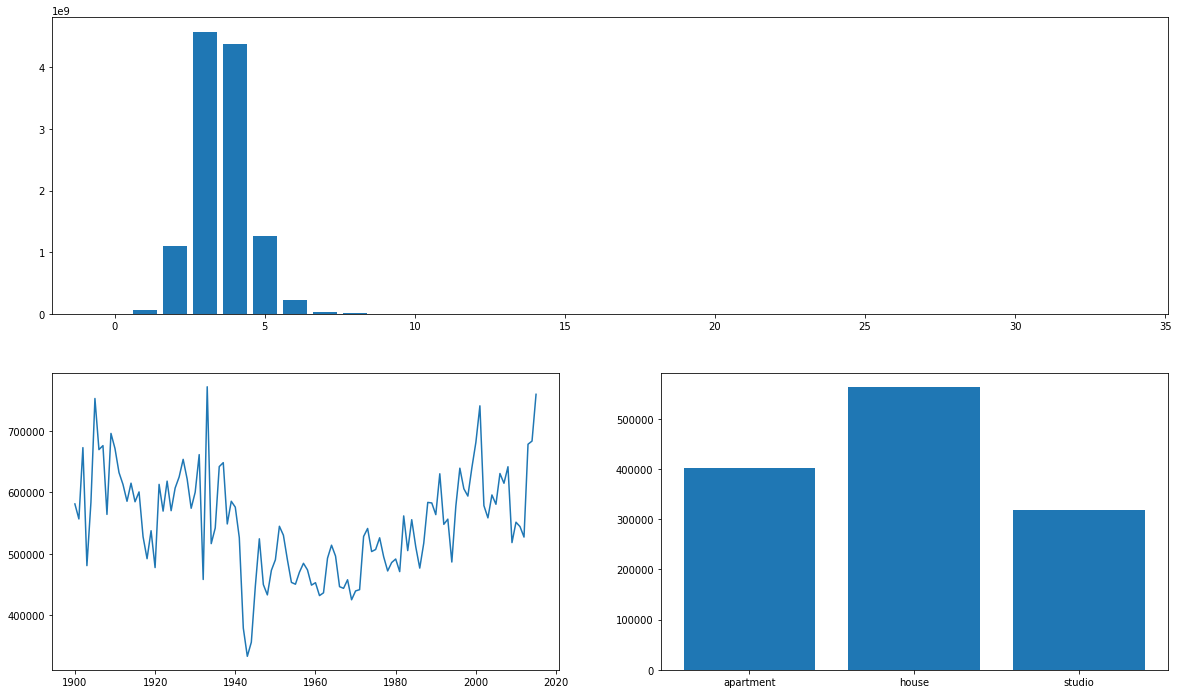

In [57]:
fig = plt.figure(figsize = (20, 12))
specs = gridspec.GridSpec(ncols = 2, nrows = 2, figure = fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 0])
ax3 = fig.add_subplot(specs[1, 1])

# Primeiro gráfico
ax1.bar(by_bedrooms['bedrooms'], by_bedrooms['price'])

# Segundo gráfico
ax2.plot(price_by_year_built['yr_built'], price_by_year_built['price'])

# Terceiro gráfico
ax3.bar(price_dormitory['dormitory_type'], price_dormitory['price'])

## 9. Crie um Dashboard com os gráficos das questões 03, 05 (Dashboard: 2 linhas)


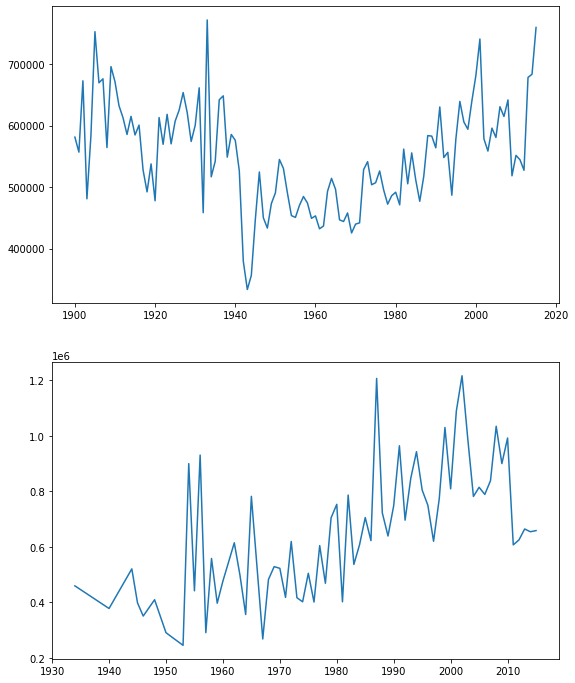

In [61]:
fig = plt.figure(figsize = (20, 12))
sepcs = gridspec.GridSpec(ncols = 1, nrows = 2, figure = fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[1, 0])


# Primeiro gráfico
ax1.plot(price_by_year_built['yr_built'], price_by_year_built['price'])

# Segundo gráfico
ax2.plot(yr_renov_price['yr_renovated'], yr_renov_price['price'])

## 10. Faça um gráfico (mapa) com o tamanho dos pontos sendo igual ao tamanho da sala de estar.

In [45]:
import plotly.express as px

houses = data[['id', 'lat', 'long', 'sqft_living']].copy()

fig = px.scatter_mapbox(houses,
                       lat = 'lat',
                       lon = 'long',
                       size = 'sqft_living',
                       color_continuous_scale = px.colors.cyclical.IceFire,
                       size_max = 15,
                       zoom = 10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600, margin= {'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()